<a href="https://colab.research.google.com/github/maverick98/CDS/blob/main/Mano_M5_AST_02_Intro_to_PySpark_A_Practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importing required packages

In [146]:
import matplotlib.pyplot as plt
import seaborn as sns

### PySpark

#### Install PySpark

In [147]:
!pip install pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [148]:
# Start spark session
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('LinearRegression').getOrCreate()
spark

### Data Processing using Pyspark

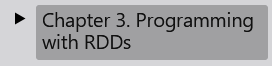

In [149]:
type(spark.sparkContext)
sc=spark.sparkContext
lines = sc.parallelize(["pandas", "i like pandas"])
lines

ParallelCollectionRDD[1084] at readRDDFromFile at PythonRDD.scala:274

In [150]:
inputRDD = sc.parallelize({1,2,3,4})
mappedRDD=inputRDD.map(lambda x:x*x)
filteredRDD=inputRDD.filter(lambda x: x%2==0)
print(mappedRDD.collect())
print(filteredRDD.collect())

[1, 4, 9, 16]
[2, 4]


In [151]:
lines = sc.parallelize(["hello world", "hi"])
flat_words = lines.flatMap(lambda line: line.split(" "))
print(flat_words.collect())

words = lines.map(lambda line: line.split(" "))
print(words.collect())


['hello', 'world', 'hi']
[['hello', 'world'], ['hi']]


In [152]:
rdd1=sc.parallelize(['coffee','coffee','panda','monkey','tea'])
rdd2=sc.parallelize(['coffee','monkey','kitty'])
print(rdd1.distinct().collect()) #requires shuffle
print(rdd1.union(rdd2).collect()) #shuffle not required
print(rdd1.intersection(rdd2).collect()) #requires shuffle
print(rdd1.subtract(rdd2).collect()) #requires shuffle

['panda', 'coffee', 'monkey', 'tea']
['coffee', 'coffee', 'panda', 'monkey', 'tea', 'coffee', 'monkey', 'kitty']
['coffee', 'monkey']
['panda', 'tea']


In [153]:
NO_OF_PARTITIONS=100
rdd=sc.parallelize([2,3,4],NO_OF_PARTITIONS) 
print(rdd.reduce(lambda x,y:x+y))#reduce is an action
PARTITION_INIT_VALUE=1
print(rdd.fold(PARTITION_INIT_VALUE,lambda x,y:x+y))#fold is an action
# Thus number of partitions is 100
# For each paritition it starts with an initial value of 1.
# Assume 2,3,4 are in same  parition.Without loss of generality we can take it 
# to be partition#1
# its sum would be 1+[2+3+4]=10
# For remaining 99 partitions the values 99*1=99
# Common sense prevailing it has to start with initial value of 1
# Thus final answers would be 1+ 10+99=110
# 
#
#


9
110


In [154]:
NO_OF_PARTITIONS=100
rdd=sc.parallelize([2,3,4],NO_OF_PARTITIONS) 
print(rdd.reduce(lambda x,y:x+y))#reduce is an action
PARTITION_INIT_VALUE=7
print(rdd.fold(PARTITION_INIT_VALUE,lambda x,y:x+y))#fold is an action
# Thus number of partitions is 100
# For each paritition it starts with an initial value of 7.
# Assume 2,3,4 are in same  parition.Without loss of generality we can take it 
# to be partition#1
# its sum would be 7+[2+3+4]=16
# For remaining 99 partitions the values 99*7=693
# Common sense prevailing it has to start with initial value of 1
# Thus final answers would be 7+ 16+693=716
# 
#
#

9
716


The way fold works is this... 

In [155]:
nums=sc.parallelize([1,2,3,4,5,6,7,8,9,10])
def seqOp(acc,value):
    return acc[0] + value, acc[1] + 1
def combOp(acc1,acc2):
    return (acc1[0] + acc2[0], acc1[1] + acc2[1])


sumCount = nums.aggregate( (10, 0), seqOp, combOp)
print(sumCount[0])
print(sumCount[0] / float(sumCount[1]))

85
8.5


In [156]:
nums=sc.parallelize([1,2,3,4,5,6,7,8,9,10])
def seqOp(acc,value):
    return acc + value
def combOp(acc1,acc2):
    return acc1+ acc2


sumCount = nums.aggregate( 0, seqOp, combOp)
print(sumCount)
#print(sumCount[0] / float(sumCount[1]))

55


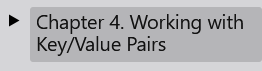

In [157]:
lines=sc.parallelize('Python')
pairs = lines.map(lambda x: (x.split(" ")[0], x))
print(pairs.collect())

[('P', 'P'), ('y', 'y'), ('t', 't'), ('h', 'h'), ('o', 'o'), ('n', 'n')]


In [158]:
rdd=sc.parallelize({(1, 2), (3, 4), (3, 6)})
rdd1=rdd.reduceByKey(lambda x,y:x+y)
print(rdd1.collect())
rdd1=rdd.groupByKey()
print(rdd1.collect())
print(rdd.mapValues(lambda x:  x+1).collect())
print(rdd.flatMapValues(lambda x: range(x,6,1)).collect())
print(rdd.keys().collect())
print(rdd.values().collect())
print(rdd.sortByKey().collect())


[(1, 2), (3, 10)]
[(1, <pyspark.resultiterable.ResultIterable object at 0x7f3f611460d0>), (3, <pyspark.resultiterable.ResultIterable object at 0x7f3f61905550>)]
[(1, 3), (3, 5), (3, 7)]
[(1, 2), (1, 3), (1, 4), (1, 5), (3, 4), (3, 5)]
[1, 3, 3]
[2, 4, 6]
[(1, 2), (3, 4), (3, 6)]


In [159]:
rdd = sc.parallelize({(1, 2), (3, 4), (3, 6)})
other=sc.parallelize({(3, 9)})
print(rdd.subtractByKey(other).collect())
print(rdd.join(other).collect())
print(rdd.rightOuterJoin(other).collect())
print(rdd.leftOuterJoin(other).collect())
print(rdd.cogroup(other).collect())



[(1, 2)]
[(3, (4, 9)), (3, (6, 9))]
[(3, (4, 9)), (3, (6, 9))]
[(1, (2, None)), (3, (4, 9)), (3, (6, 9))]
[(1, (<pyspark.resultiterable.ResultIterable object at 0x7f3f61b1d820>, <pyspark.resultiterable.ResultIterable object at 0x7f3f61867340>)), (3, (<pyspark.resultiterable.ResultIterable object at 0x7f3f618fcdc0>, <pyspark.resultiterable.ResultIterable object at 0x7f3f618e3220>))]


In [160]:
rdd=sc.parallelize({('panda', 0), ('pink', 3), ('pirate', 3),('panda', 1),('pink', 4)})
print(rdd.mapValues(lambda x:(x,1)).reduceByKey(lambda x,y:(x[0]+y[0],x[1]+y[1])).collect())

[('panda', (1, 2)), ('pink', (7, 2)), ('pirate', (3, 1))]


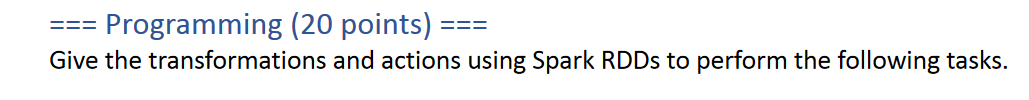

1 Given an input Key-Value RDD consisting of URL string as key and English text (string) as value,return an inverted index key-value RDD from each word in the text as key to the list of URLs as the value. [4 points]

In [161]:
urlTextRDD=sc.parallelize([('www.google.com','Module5 is boring'),('www.yahoo.com','yahoo is defunct'),('www.sun.com','sun is defunct'),('www.oracle.com','oracle took over sun')])
urlTextRDD.collect()

[('www.google.com', 'Module5 is boring'),
 ('www.yahoo.com', 'yahoo is defunct'),
 ('www.sun.com', 'sun is defunct'),
 ('www.oracle.com', 'oracle took over sun')]

In [162]:
invertedIndexRDD= urlTextRDD.flatMapValues(lambda v: v.split(' ')).map(lambda  x:(x[1],x[0])).groupByKey().map(lambda x:(x[0],list(x[1])))
invertedIndexRDD.collect()

[('is', ['www.google.com', 'www.yahoo.com', 'www.sun.com']),
 ('boring', ['www.google.com']),
 ('defunct', ['www.yahoo.com', 'www.sun.com']),
 ('sun', ['www.sun.com', 'www.oracle.com']),
 ('oracle', ['www.oracle.com']),
 ('took', ['www.oracle.com']),
 ('Module5', ['www.google.com']),
 ('yahoo', ['www.yahoo.com']),
 ('over', ['www.oracle.com'])]

2 . Given an inverted Index key-value RDD from keyword (key) to list of URLs (value), a PageRank
key-value RDD from URL (key) to PageRank of that URL (float value) and a query string variable with
one or more keywords, return the URLs having the top-10 largest Page Rank values containing all the
keywords in the given query string, and with the URLs sorted in descending order by PageRank value.
[8 points]

In [163]:
urlPagerankRDD=sc.parallelize([('www.google.com',0.25),('www.yahoo.com',0.01),('www.sun.com',0.09),('www.oracle.com',0.19)])
urlPagerankRDD.collect()
queryStr='defunct is'
queryKeys = queryStr.split(' ')
#print('----------') 
#print(queryKeys[0])
matchURLRDD =invertedIndexRDD.filter(lambda x: x[0]==queryKeys[0]).flatMap(lambda x:list(x[1]))
#print(matchURLRDD.collect())
#print('----------') 
for query in queryKeys:
    #print('----------') 
    #print(query)
    matchOtherURLRDD =invertedIndexRDD.filter(lambda x: x[0]==query).flatMap(lambda x:list(x[1]))
    #print(matchOtherURLRDD.collect())
    matchURLRDD = matchURLRDD.intersection(matchOtherURLRDD)
    #print(matchURLRDD.collect())
    #print('----------') 
#print('*********')    
#print(matchURLRDD .collect()) 


matchURLNulRDD = matchURLRDD.map( lambda x : (x, 0))
#print('*********')    
#print(matchURLNulRDD .collect()) 


matchURLPagerankRDD = matchURLNulRDD.join(urlPagerankRDD).map( lambda x : (x[0],x[1]))
matchPagerankURLRDD = matchURLPagerankRDD.map(lambda x : (x[1],x[0]))
#Sort and return URLs with top 10 Pagerank values
top10PagerankURL = matchPagerankURLRDD.sortByKey().top(10)

print("Final output ......",top10PagerankURL)


Final output ...... [((0, 0.09), 'www.sun.com'), ((0, 0.01), 'www.yahoo.com')]


3 Given a key-value RDD from URL (key) to PageRank (float value), and a URL title RDD from URL
(key) to webpage title (string value), return an output containing the inner join of the two RDDs by
URL and in sorted order of PageRank. [4 points]

In [164]:
urlPagerankRDD=sc.parallelize([('www.google.com',0.25),('www.yahoo.com',0.01),('www.sun.com',0.09),('www.oracle.com',0.19)])
urlTitleRDD=sc.parallelize([('www.google.com','Module5 is boring'),('www.yahoo.com','yahoo is defunct'),('www.sun.com','sun is defunct'),('www.oracle.com','oracle took over sun')])

In [165]:
urlRankTitleRDD = urlPagerankRDD.join(urlTitleRDD)
rankUrlTitlesRDD = urlRankTitleRDD.map( lambda x : (x[1][0],x[0]))
print(rankUrlTitlesRDD.sortByKey(False).collect())

[(0.25, 'www.google.com'), (0.19, 'www.oracle.com'), (0.09, 'www.sun.com'), (0.01, 'www.yahoo.com')]


4 Describe how you will implement reduceByKey transformation using a combineByKey
transformation. [4 points]

In [166]:
rdd=sc.parallelize({('Einstein', 2), ('Bohr', 4), ('Bohr', 6),('Newton',1)})
def funcAgg(x,y):
    return x+y
rdd1=rdd.reduceByKey(funcAgg)
print(rdd1.collect())

def createCombiner(value):
    return value
def mergeValue(acc,value):
    return  acc+value
    
def mergeCombiners(acc1,acc2):
    return acc1+acc2
           
rdd2 = rdd.combineByKey(createCombiner,mergeValue,mergeCombiners)
print(rdd2.collect())


[('Bohr', 10), ('Newton', 1), ('Einstein', 2)]
[('Bohr', 10), ('Newton', 1), ('Einstein', 2)]


In [167]:


def createCombiner(value):
    return (value,1)
def mergeValue(acc,value):
    return  (acc[0]+value,acc[1]+1)
    
def mergeCombiners(acc1,acc2):
    return (acc1[0]+acc2[0],acc1[1]+acc2[1])
           
rdd2 = rdd.combineByKey(createCombiner,mergeValue,mergeCombiners)
print(rdd2.collect())

[('Bohr', (10, 2)), ('Newton', (1, 1)), ('Einstein', (2, 1))]
